## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Nombre y Apellido: Juan Lauría

***
## Ventanas


<div class="alert alert-block alert-info">
<b>1)</b> Implemente las funciones para generar las siguientes ventanas $w(k)$:

</div>

+ Bartlett ó triangular
+ Hann
+ Blackman
+ Flat-top



<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede consultar el capítulo 6.3 del libro de B. Porat para obtener las expresiones analíticas de cada ventana.

</div>

   a) Para cada ventana grafique $w(k)$ y el módulo de su espectro $ \lvert W(\Omega) \rvert $


<div class="alert alert-block alert-warning">
<img src="./ojo.svg" align="left" width="50" />  Normalice la amplitud máxima de todas las ventanas a 0 dB.
</div>

In [21]:
## Inicialización del Notebook del TP2

import numpy as npy
import scipy as spy
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML

N  = 1000 # muestras
fs = 1000 # Hz

# Insertar aquí el código para inicializar tu notebook
########################################################
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  7 20:46:43 2020

@author: jbl
"""

import numpy as npy
import matplotlib.pyplot as plt
import scipy as spy

def mi_func_sen (vmax, dc, ff, ph, nn, fs):
    
   tt = npy.arange(nn/fs, step=1/fs)          
   
   xx = vmax * npy.sin((2 * npy.pi * ff * tt) + ph) + dc
   
   return tt,xx

def mi_ruido (N,fs,sigma,mu):
    tt = npy.arange(N/fs, step=1/fs)
    ruido = npy.random.normal(mu,sigma,N)
    
    return tt,ruido

def fft_modulo_fase (tt,senial,fs,N):
    df = fs / N
    ff = npy.linspace(0, (N-1)*df, N).flatten()
    
    #senial_fft = npy.fft.fft(senial)
    senial_fft = spy.fft.fft(senial)

    modulo = npy.abs(senial_fft)
    fase = npy.angle (senial_fft)
    fase [modulo < 1] = 0
    
    return ff[ff <= fs/2],(2/N)*modulo[ff <= fs/2],fase[ff <= fs/2]
    

def mi_func_ADC (vmax, signal,nbits):
    # q = vmax / (2**(nbits-1) - 1)
    # value = signal / q
    # samples = npy.round(value)
    # return samples

    mlevel = (2 ** (nbits - 1))
    qx = (2*vmax/mlevel) * npy.round( (mlevel/(2*vmax)) * signal )
    return qx

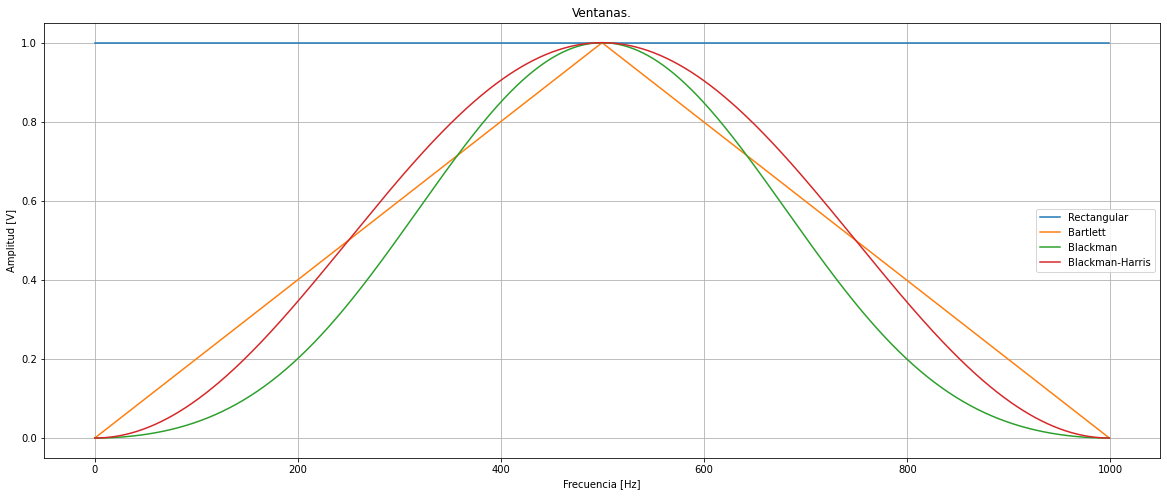

In [34]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

import numpy as npy
import matplotlib.pyplot as plt
import scipy as spy
from scipy import signal
## Datos

fs = 1000
N  = 1000

#################################
#################################

lista_ventanas = []

tt = npy.arange(0,N)

## Creación de las ventanas
lista_ventanas.append (spy.signal.boxcar(N))  # Ventana Rectangular
lista_ventanas.append (spy.signal.bartlett(N)) # Ventana de Bartlett
lista_ventanas.append (spy.signal.blackman(N)) # Ventana de Blackman
lista_ventanas.append (spy.signal.hann(N)) # Ventana de Blackman-Harris
lista_ventanas.append (spy.signal.flattop(N)) # Ventana flattop
ventanas = ['Rectangular','Bartlett','Blackman','Blackman-Harris','Flattop']

## Ploteo de todas las ventanas.
plt.figure(1,figsize=(20,8))
plt.title('Ventanas.')
for i in range(4):
    plt.plot(tt,lista_ventanas[i],label=ventanas[i])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [V]')
plt.grid()
plt.legend()
plt.show()

<ipython-input-35-9242f7969dff>:29: RuntimeWarning: divide by zero encountered in log10
  tlog.append (20 * npy.log10 (modulos[0] / modulos[0][0]))
<ipython-input-35-9242f7969dff>:30: RuntimeWarning: divide by zero encountered in log10
  tlog.append (20 * npy.log10 (modulos[1] / modulos[1][0]))
<ipython-input-35-9242f7969dff>:31: RuntimeWarning: divide by zero encountered in log10
  tlog.append (20 * npy.log10 (modulos[2] / modulos[2][0]))
<ipython-input-35-9242f7969dff>:32: RuntimeWarning: divide by zero encountered in log10
  tlog.append (20 * npy.log10 (modulos[3] / modulos[3][0]))
<ipython-input-35-9242f7969dff>:33: RuntimeWarning: divide by zero encountered in log10
  tlog.append (20 * npy.log10 (modulos[3] / modulos[4][0]))


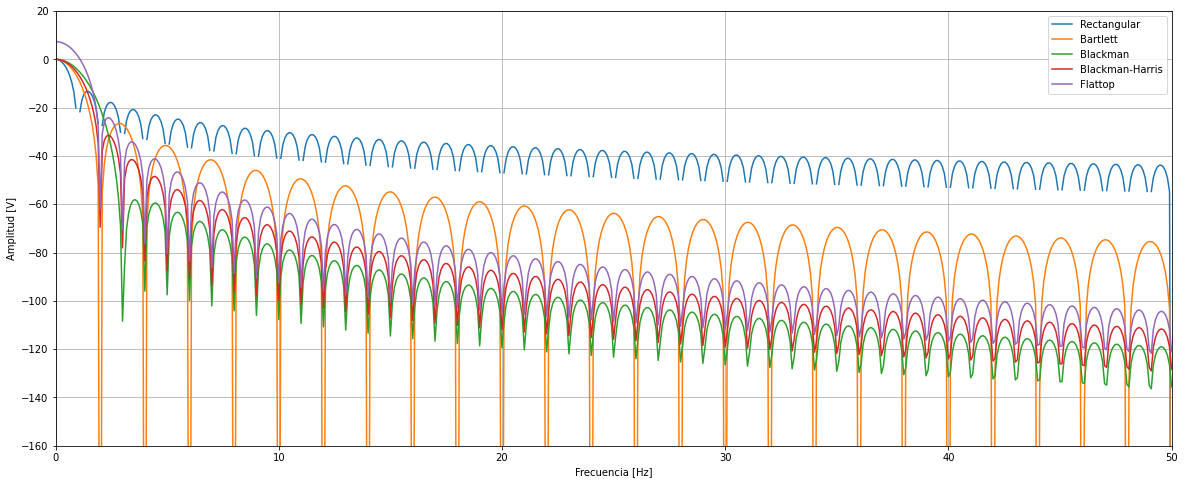

In [35]:
## Módulo FFT.
ceros = npy.zeros(int(10*N))

modulos = []
lista_ff = []
tt = npy.arange(0,N + 10*N)
for i in range(5):
    lista_ventanas[i] = npy.append(lista_ventanas[i],ceros)

ff1,mod1,fas = fft_modulo_fase(tt,lista_ventanas[0],fs,N + 10*N)
ff2,mod2,fas = fft_modulo_fase(tt,lista_ventanas[1],fs,N + 10*N)
ff3,mod3,fas = fft_modulo_fase(tt,lista_ventanas[2],fs,N + 10*N)
ff4,mod4,fas = fft_modulo_fase(tt,lista_ventanas[3],fs,N + 10*N)
ff5,mod5,fas = fft_modulo_fase(tt,lista_ventanas[4],fs,N + 10*N)

modulos.append(mod1)
modulos.append(mod2)
modulos.append(mod3)
modulos.append(mod4)
modulos.append(mod5)
lista_ff.append(ff1)
lista_ff.append(ff2)
lista_ff.append(ff3)
lista_ff.append(ff4)
lista_ff.append(ff5)

tlog = []

tlog.append (20 * npy.log10 (modulos[0] / modulos[0][0]))
tlog.append (20 * npy.log10 (modulos[1] / modulos[1][0]))
tlog.append (20 * npy.log10 (modulos[2] / modulos[2][0]))
tlog.append (20 * npy.log10 (modulos[3] / modulos[3][0]))
tlog.append (20 * npy.log10 (modulos[3] / modulos[4][0]))

plt.figure(2,figsize=(20,8))
for i in range(5):
    plt.plot(lista_ff[i],tlog[i],label=ventanas[i])
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [V]')
plt.xlim(0,50)
plt.ylim(-160,20)
plt.grid()
plt.legend()
plt.show()

b) Construya una tabla en la que figure la anchura normalizada del lóbulo principal  de la ventana, $\Omega_1$, siendo 

$$ \lvert W(\Omega_1) \rvert = \frac{\sqrt{2}}{2}$$ 

y el valor de transferencia máxima de los lóbulos secundarios expresado en dB 

$$ W_2 = \mathop{max} \{\lvert W(\Omega) \rvert\} ,\space\space \forall \space \Omega \geq \Omega_0 $$

siendo $\Omega_0$ la frecuencia del primer cruce por cero $\lvert W(\Omega) \rvert\ = 0$ ó la frecuencia límite superior del lóbulo principal. Utilice como norma de frecuencia la frecuencia de Nyquist, de manera que las mediciones de frecuencias sean adimensionales y comparables independientemente de la frecuencia de muestreo.

In [40]:
tr= []
normalize = tlog

for i in range(5):
    peaks, _ = signal.find_peaks(normalize[i]) # Obtengo los máximos de cada lob.
    results_half = signal.peak_widths(normalize[i], peaks, rel_height=npy.sqrt(2)/2) 
    peaks = npy.sort(peaks) # Ordeno de menor a mayor para tener al primer lob en peaks[0]                     
    the_peak = normalize[i][peaks[0]] # VAlor máximo del primer lóbulo.
    tr.append([float(results_half[2][0]),the_peak])
    
    if i == 4: ## Revisando los gráficos, el código realizado no informaba correctamente los valores esperados
               ## para la tabla para el caso de la ventana flattop
              ##por lo que tuve que observar los picos y buscar alguna relación: 2*the_peak
                
        the_peak = normalize[i][peaks[3]]
        tr.append([float(peaks[3]),2*the_peak])
        
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   tr[0], # <-- acá debería haber numeritos :)
                   tr[1], # <-- acá debería haber numeritos :)
                   tr[3], # <-- acá debería haber numeritos :)
                   tr[2], # <-- acá debería haber numeritos :)
                   tr[5] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$f_1$ (#)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())

,$f_1$ (#),$W_2$ (dB)
Rectangular,11.000000,-13.286376
Bartlett,22.322590,-26.566965
Hann,22.354469,-31.467329
Blackman,33.651332,-58.110182
Flat-top,60.000000,-93.258302


<div class="alert alert-block alert-info">
<b>2)</b> Genere una señal bitonal de las siguientes características
</div>


  $  x(k) = x_1(k) + x_2(k) $

  $  x_1(k) = sen(\Omega_1·k)$

  $  x_2(k) = a_2 · sen(\Omega_2·k)   $

siendo 

  $\Omega_1 = \frac{\pi}{2}$

  $\Omega_2 = \Omega_1 + 10·\frac{2\pi}{N}$

  $a_2 = -40$ dB


Responda a las siguientes consignas:

<div class="alert alert-block alert-info">
<b>2.a)</b>  Calcule el espectro $ \lvert X(\Omega) \rvert $

</div>

In [86]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

v1 = 1
v2 = 10 ** (-40/20)
dc = 0
ph = 0
fs = 1000
N = 1000

# Resolución espectral unitaria.
df = fs / N

# Obtengo las pulsaciones.
o1 = fs / 4
o2 = o1 + (10 * df)

# Creo ambas señales.
tt1, x1 = mi_func_sen (v1, dc, o1, ph, N, fs)
tt2, x2 = mi_func_sen (v2, dc, o2, ph, N, fs)

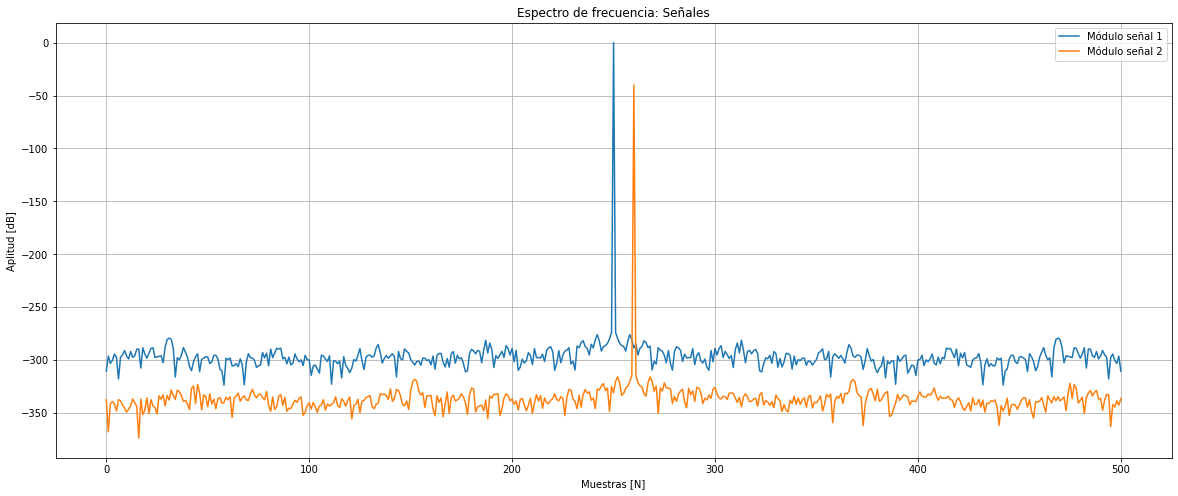

In [87]:
# FFT para ambas señales por separado.
ff1, mod1, fase1 = fft_modulo_fase (tt1,x1,fs,N)
ff2, mod2, fase2 = fft_modulo_fase (tt2,x2,fs,N)

mod1 = 20 * npy.log10(mod1)
mod2 = 20 * npy.log10(mod2)

# Ploteo.
plt.figure(1,figsize=(20,8))
plt.plot (ff1, mod1,label='Módulo señal 1')
plt.plot (ff2, mod2,label='Módulo señal 2')
plt.title('Espectro de frecuencia: Señales')
plt.xlabel('Muestras [N]')
plt.ylabel('Aplitud [dB]')
plt.legend()
plt.grid()

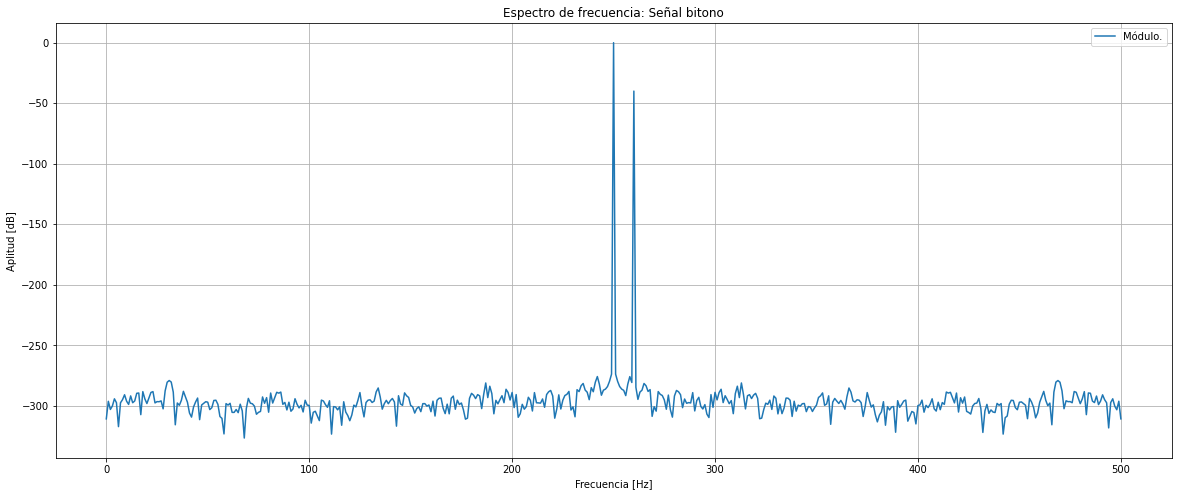

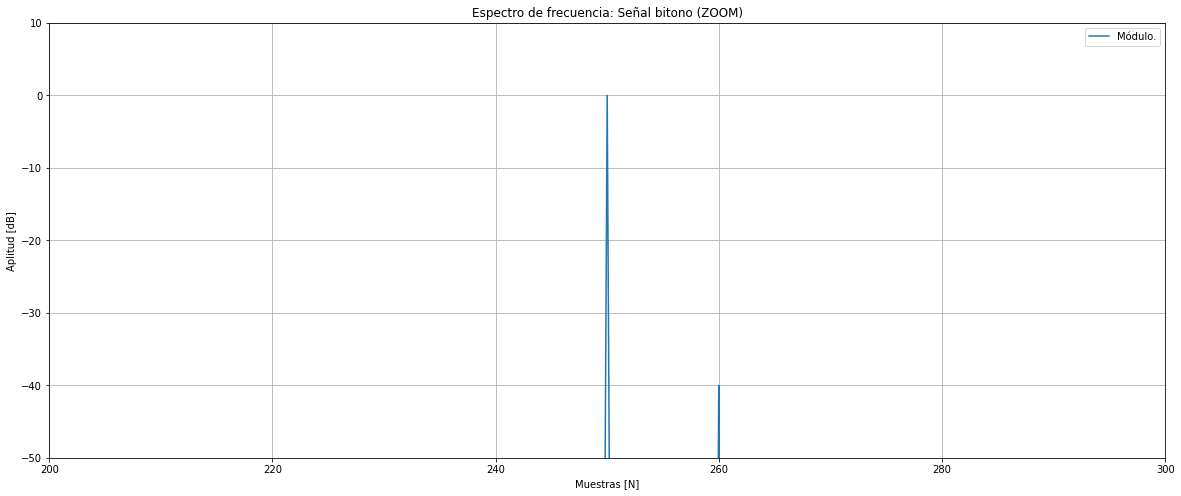

In [88]:
# Sumo las señales.
xt = x1 + x2

# Espectro de frecuencia en dB.
ff, mod, fase = fft_modulo_fase (tt2,xt,fs,N)
mod = 20 * npy.log10(mod)

# Ploteo.
plt.figure(1,figsize=(20,8))
plt.plot (ff, mod,label='Módulo.')
plt.title('Espectro de frecuencia: Señal bitono')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Aplitud [dB]')
plt.legend()
plt.grid()

plt.figure(2,figsize=(20,8))
plt.plot (ff, mod,label='Módulo.')
plt.title('Espectro de frecuencia: Señal bitono (ZOOM)')
plt.xlabel('Muestras [N]')
plt.ylabel('Aplitud [dB]')
plt.xlim(200,300)
plt.ylim(-50,10)
plt.legend()
plt.grid()


<div class="alert alert-block alert-info">
<b>2.b)</b> Repita a) disminuyendo la amplitud de $x_2$.
</div>

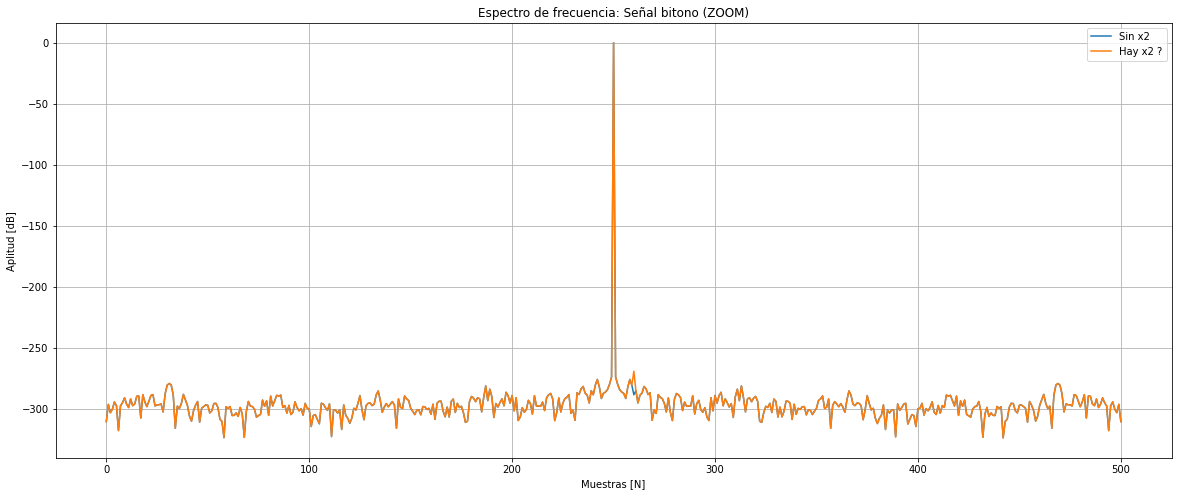

In [89]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
v1 = 1
# db = 6.8 * db

# Puse un valor muy alto para eliminar el pico correspondiente.
# Luego fui variando db hasta poder volver visualizarlo.
# Aproximadamente -270 db ya se empieza a apreciar.
db_high = -2750
db = -270
v2 = 10 ** (db_high /20)
v3 = 10 ** (db/20)

dc = 0
ph = 0
fs = 1000
N = 1000

df = fs / N

o1 = fs / 4
o2 = o1 + (10 * df)

# Armo una tercera señal dónde varié la amplitud.
tt1, x1 = mi_func_sen (v1, dc, o1, ph, N, fs)
tt2, x2 = mi_func_sen (v2, dc, o2, ph, N, fs)
tt3, x3 = mi_func_sen (v3, dc, o2, ph, N, fs)

xt = x1 + x2
xt_2 = x1 + x3
ff, mod, fase = fft_modulo_fase (tt2,xt,fs,N)
ff2, mod2, fase2 = fft_modulo_fase (tt2,xt_2,fs,N)

mod = 20 * npy.log10(mod)
mod2 = 20 * npy.log10(mod2)


# Ploteo.
plt.figure(2,figsize=(20,8))
plt.plot (ff, mod,label='Sin x2')
plt.plot(ff2, mod2,label='Hay x2 ?')
plt.title('Espectro de frecuencia: Señal bitono (ZOOM)')
plt.xlabel('Muestras [N]')
plt.ylabel('Aplitud [dB]')
plt.legend()
plt.grid()

¿Cuál es el factor de escala mínimo de $x_2$, definido como $a^0_2$, que permite evidenciar su existencia en el espectro de $\lvert X(\Omega) \rvert$ ?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> El valor utilizado mediante el cual se puede evidenciar al segundo tono respecto del primer tono es de -270dB. Para definir este valor, he manipulado dicha variable y observado el gráfico en la simulación anterior hasta poder visualizar $X_2$ en el espectro. Como se puede apreciar en el gráfico anterior, el espectro en color naranja se superpone sobre el celeste. Por debajo de este valor no se puede visualizarlo.
</div>

¿De qué depende poder medir $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Depende de la no existencia de desparramo espectral ya que las señalas simuladas corresponden a múltiplos enteros de la resolución espectral utilizada.
</div>

Considere ahora que esta señal proviene de un ADC de 16 bits. Incorpore al análisis el correspondiente ruido de cuantización. ¿Cómo afecta esta situación la medición de $x_2$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Suponiendo que dicha señal bitonal será cuantizada, dicho proceso moverá el piso de ruido hacia arriba. Por lo tanto, se espera que la amplitud de la señal $x_2$ sea mayor que la observada anteriormente para poder visualizarla en el espectro.
</div>

<div class="alert alert-block alert-info">
<b>2.c)</b> Repita a) incrementando la frecuencia de $x_1$ para $\Omega_1 = \frac{\pi}{2} + d_1·\frac{2\pi}{N}$ para valores de $d_1 = (0,01; 0.25; 0.5)$. Aumente la amplitud de $a_2$ hasta que se evidencie sobre el leakage y construya una tabla con dicho valor para las 3 situaciones correspondientes a desintonías leve, moderada y máxima.
</div>

In [41]:
## Inicialización.

v1 = 1

dc = 0
ph = 0
fs = 1000
N = 1000

df = fs / N

o1 = fs / 4
o2 = o1 + (10 * df)

fd = [0.01,0.25,0.5]

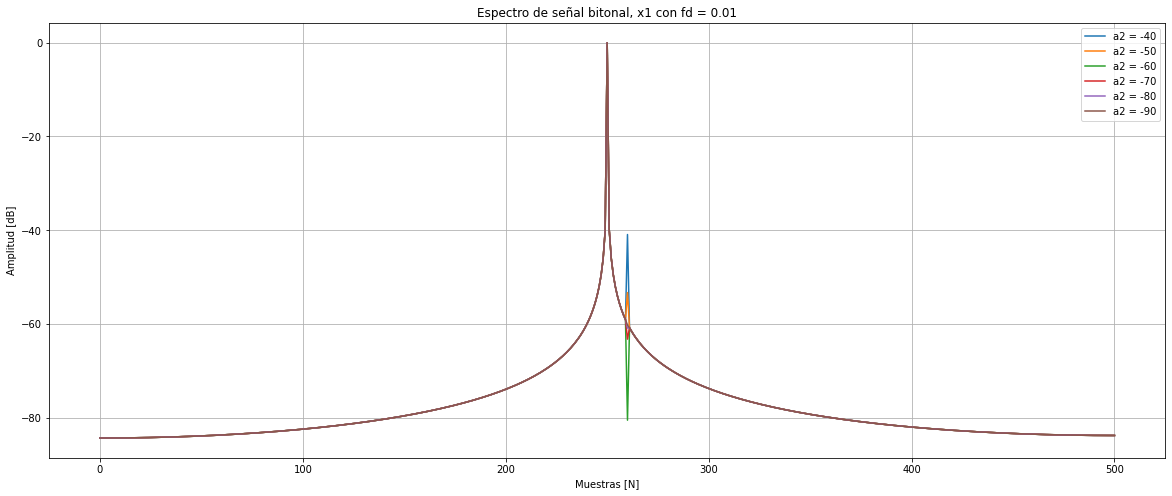

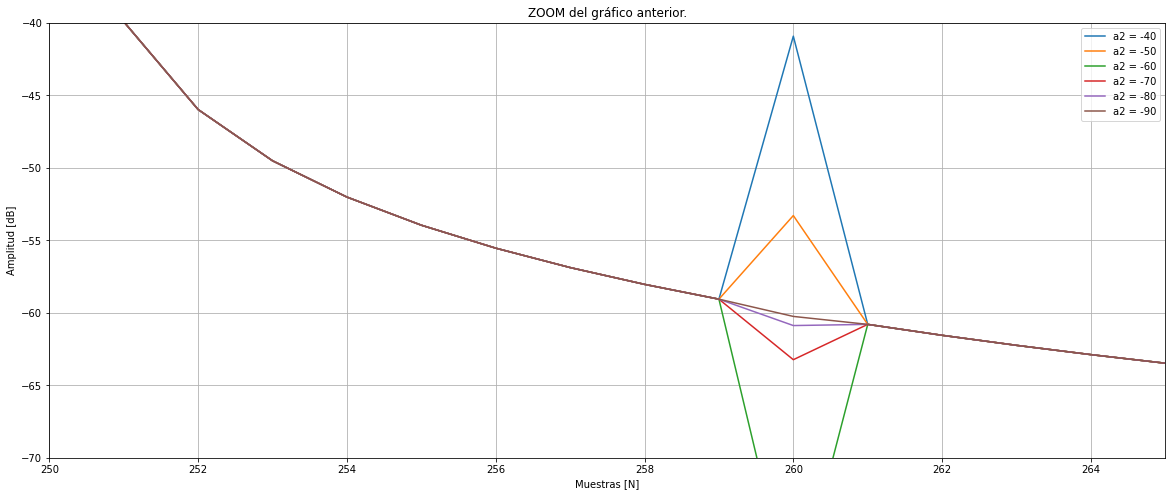

In [48]:
## Para fd = 0.01
db = -40 # Amplitud inicial de x2.

td1,xd1 = mi_func_sen (v1, dc, o1 + fd[0] * df, ph, N, fs) # x1 con desintonia.

plt.figure(1,figsize=(20,8)) # Ploteo el espectro variando la amplitud de x2.
for i in range(6):
    v2 = 10 ** (db/20)
    tt2, x2 = mi_func_sen (v2, dc, o2, ph, N, fs)

    senial1 = xd1 + x2

    frec1, md1, a = fft_modulo_fase (td1,senial1,fs,N)
    md1 = 20*npy.log10(md1)
    
    texto = str(db)
    db = db -10
    plt.plot(md1,label='a2 = ' + texto)
plt.title('Espectro de señal bitonal, x1 con fd = 0.01')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()

db = -40

plt.figure(2,figsize=(20,8)) # Ploteo el espectro variando la amplitud de x2.
for i in range(6):
    v2 = 10 ** (db/20)
    tt2, x2 = mi_func_sen (v2, dc, o2, ph, N, fs)

    senial1 = xd1 + x2

    frec1, md1, a = fft_modulo_fase (td1,senial1,fs,N)
    md1 = 20*npy.log10(md1)
    
    texto = str(db)
    db = db -10
    plt.plot(md1,label='a2 = ' + texto)
    plt.xlim(250,265)
    plt.ylim(-70,-40)
plt.title('ZOOM del gráfico anterior.')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()

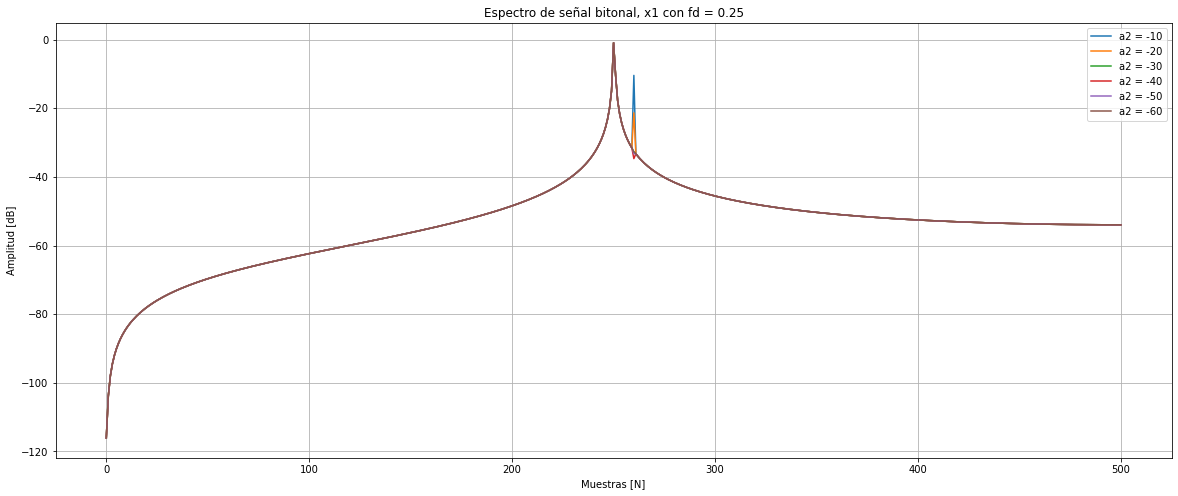

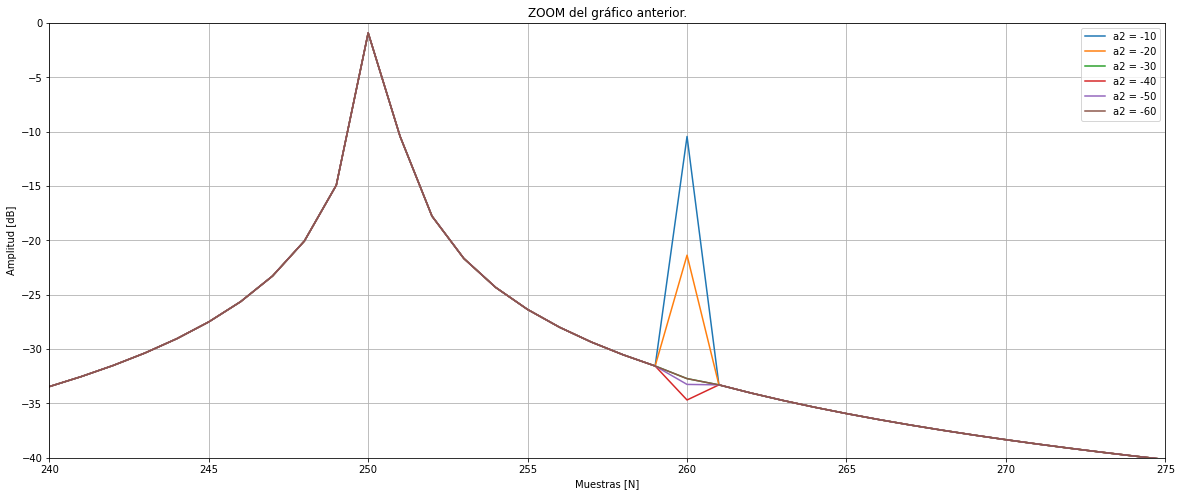

In [53]:
## Para fd = 0.25
db = -10 # Amplitud inicial de x2.

td1,xd1 = mi_func_sen (v1, dc, o1 + fd[1] * df, ph, N, fs) # x1 con desintonia.

plt.figure(3,figsize=(20,8)) # Ploteo el espectro variando la amplitud de x2.
for i in range(6):
    v2 = 10 ** (db/20)
    tt2, x2 = mi_func_sen (v2, dc, o2, ph, N, fs)

    senial1 = xd1 + x2

    frec1, md1, a = fft_modulo_fase (td1,senial1,fs,N)
    md1 = 20*npy.log10(md1)
    
    texto = str(db)
    db = db -10
    plt.plot(md1,label='a2 = ' + texto)
plt.title('Espectro de señal bitonal, x1 con fd = 0.25')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()

db = -10

plt.figure(4,figsize=(20,8)) # Ploteo el espectro variando la amplitud de x2.
for i in range(6):
    v2 = 10 ** (db/20)
    tt2, x2 = mi_func_sen (v2, dc, o2, ph, N, fs)

    senial1 = xd1 + x2

    frec1, md1, a = fft_modulo_fase (td1,senial1,fs,N)
    md1 = 20*npy.log10(md1)
    
    texto = str(db)
    db = db -10
    plt.plot(md1,label='a2 = ' + texto)
    plt.xlim(240,275)
    plt.ylim(-40,0)
plt.title('ZOOM del gráfico anterior.')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()

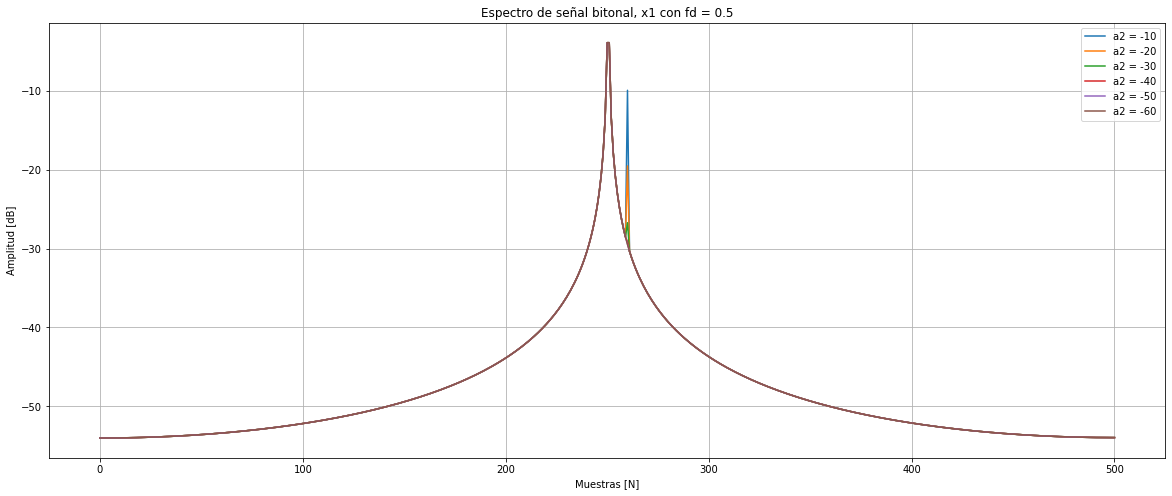

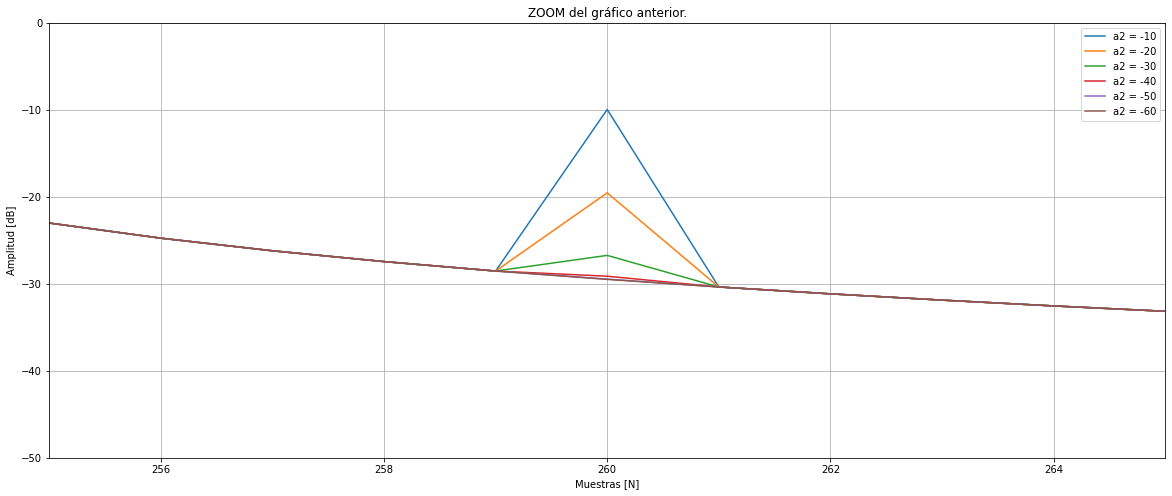

In [60]:
## Para fd = 0.01
db = -10 # Amplitud inicial de x2.

td1,xd1 = mi_func_sen (v1, dc, o1 + fd[2] * df, ph, N, fs) # x1 con desintonia.

plt.figure(1,figsize=(20,8)) # Ploteo el espectro variando la amplitud de x2.
for i in range(6):
    v2 = 10 ** (db/20)
    tt2, x2 = mi_func_sen (v2, dc, o2, ph, N, fs)

    senial1 = xd1 + x2

    frec1, md1, a = fft_modulo_fase (td1,senial1,fs,N)
    md1 = 20*npy.log10(md1)
    
    texto = str(db)
    db = db -10
    plt.plot(md1,label='a2 = ' + texto)
plt.title('Espectro de señal bitonal, x1 con fd = 0.5')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()

db = -10

plt.figure(2,figsize=(20,8)) # Ploteo el espectro variando la amplitud de x2.
for i in range(6):
    v2 = 10 ** (db/20)
    tt2, x2 = mi_func_sen (v2, dc, o2, ph, N, fs)

    senial1 = xd1 + x2

    frec1, md1, a = fft_modulo_fase (td1,senial1,fs,N)
    md1 = 20*npy.log10(md1)
    
    texto = str(db)
    db = db -10
    plt.plot(md1,label='a2 = ' + texto)
    plt.xlim(255,265)
    plt.ylim(-50,-0)
plt.title('ZOOM del gráfico anterior.')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()

In [62]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   str(-50), # <-- acá debería haber numeritos :)
                   str(-20), # <-- acá debería haber numeritos :)
                   str(-30) # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a_2$ (dB)'],
               index=[  
                        'leve',
                        'moderada',
                        'máxima',
                     ])
HTML(df.to_html())

,$a_2$ (dB)
leve,-50
moderada,-20
máxima,-30


<div class="alert alert-block alert-warning">
<b>Comentario:</b> La tabla se completó a partir de la visualización de los 6 gráficos anteriores. Para cada caso de desintonía, se realizó una iteración de 6 ploteos, dónde en los espectros que se iban a visualizar se iba variando la amplitud de la señal $x_2$ en -10dB. También se realizó un zoom de dichos espectros para poder apreciar cuando aparecía dicha señal.
</div>

<div class="alert alert-block alert-info">
<b>2.d)</b> Evalúe el efecto de utilizar las ventanas implementadas en 1). Complete la tabla comparativa con respecto a la ventana rectangular, respecto a las mediciones $a^0_2$ realizada en 2.b); y $a^1_2$ en 2.c) para el caso de desintonía máxima.
</div>

Grafique $\lvert X_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w(k) \} \rvert $ para las 4 ventanas de 1).

In [112]:
import numpy as npy
import matplotlib.pyplot as plt
import scipy as spy
from scipy import signal

## Generación de señal bitonal sin desintonía.

v1 = 1
dc = 0
ph = 0
fs = 1000
N = 1000

# Resolución espectral unitaria.
df = fs / N

# Obtengo las pulsaciones.
o1 = fs / 4
o2 = o1 + (10 * df)

# Creo x1
tt1, x1 = mi_func_sen (v1, dc, o1, ph, N, fs)

# Creo las ventanas.
rect = spy.signal.boxcar(N)
bart = spy.signal.bartlett(N)
hann = spy.signal.hann(N)
blackman = spy.signal.blackman(N)
flattop = spy.signal.flattop(N)

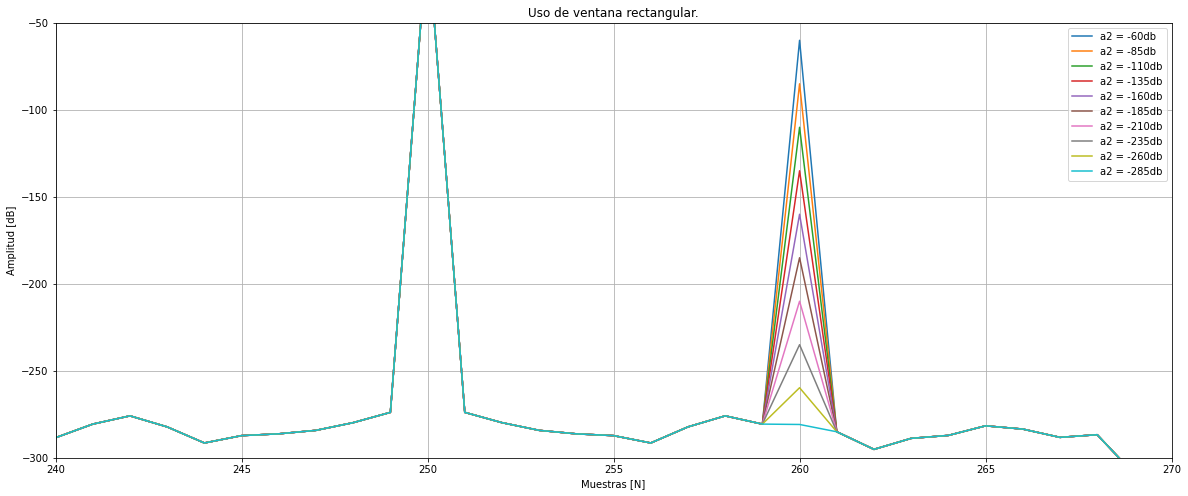

In [113]:
# Ventana rectangular sin desintonía.
db = -60

plt.figure(1,figsize=(20,8))
for i in range(10):
    v2 = 10 ** (db/20)
    tt2, x2 = mi_func_sen (v2, dc, o2, ph, N, fs)
    xt = x1 + x2
    
    w_rect = rect * xt
    e_rect = abs (npy.fft.fft(w_rect)) * (2/N)
    e_rect = 20 * npy.log10(e_rect)
    
    plt.plot(e_rect[:500],label='a2 = '+str(db)+'db')
    db = db - 25
plt.title('Uso de ventana rectangular.')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.xlim(240,270)
plt.ylim(-300,-50)
plt.legend()
plt.grid()

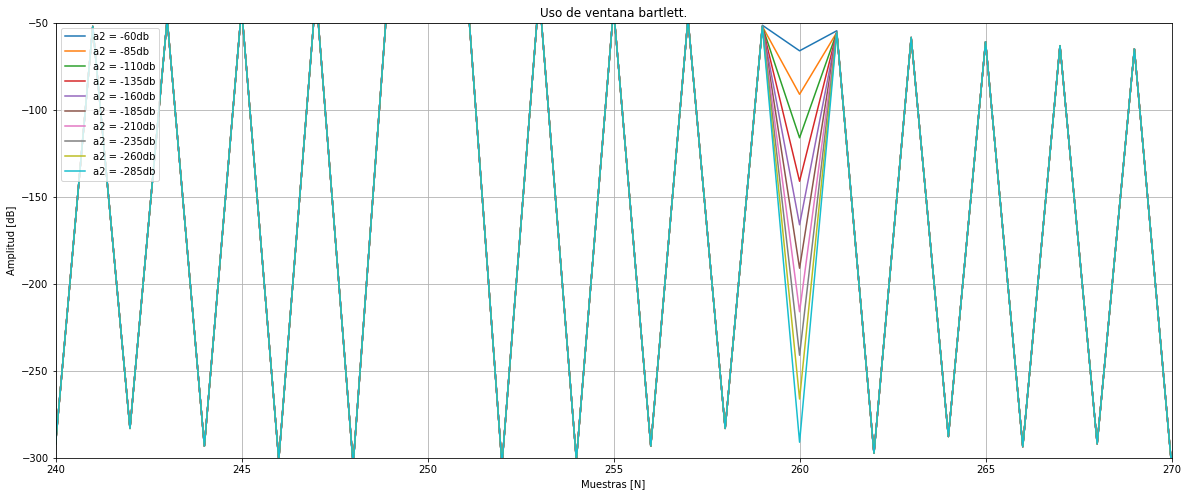

In [114]:
# Ventana bartlett sin desintonía.
db = -60

plt.figure(1,figsize=(20,8))
for i in range(10):
    v2 = 10 ** (db/20)
    tt2, x2 = mi_func_sen (v2, dc, o2, ph, N, fs)
    xt = x1 + x2
    
    w = bart * xt
    e = abs (npy.fft.fft(w)) * (2/N)
    e = 20 * npy.log10(e)
    
    plt.plot(e[:500],label='a2 = '+str(db)+'db')
    db = db - 25
plt.title('Uso de ventana bartlett.')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.xlim(240,270)
plt.ylim(-300,-50)
plt.legend()
plt.grid()

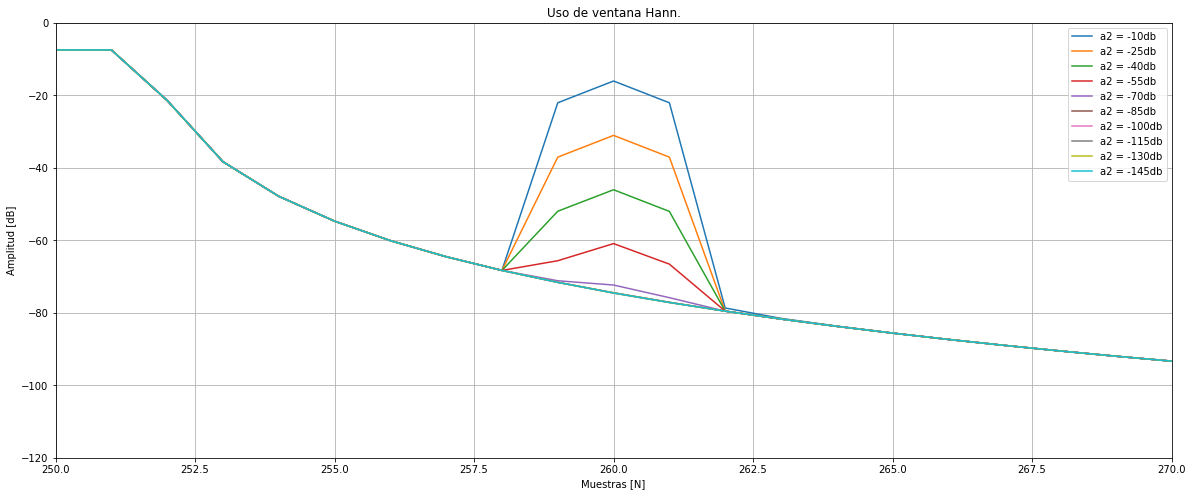

In [108]:
# Ventana hann sin desintonía.
db = -10

plt.figure(1,figsize=(20,8))
for i in range(10):
    v2 = 10 ** (db/20)
    tt2, x2 = mi_func_sen (v2, dc, o2, ph, N, fs)
    xt = x1 + x2
    
    w= hann * xt
    e = abs (npy.fft.fft(w)) * (2/N)
    e = 20 * npy.log10(e)
    
    plt.plot(e[:500],label='a2 = '+str(db)+'db')
    db = db - 15
plt.title('Uso de ventana Hann.')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.xlim(250,270)
plt.ylim(-120,0)
plt.legend()
plt.grid()


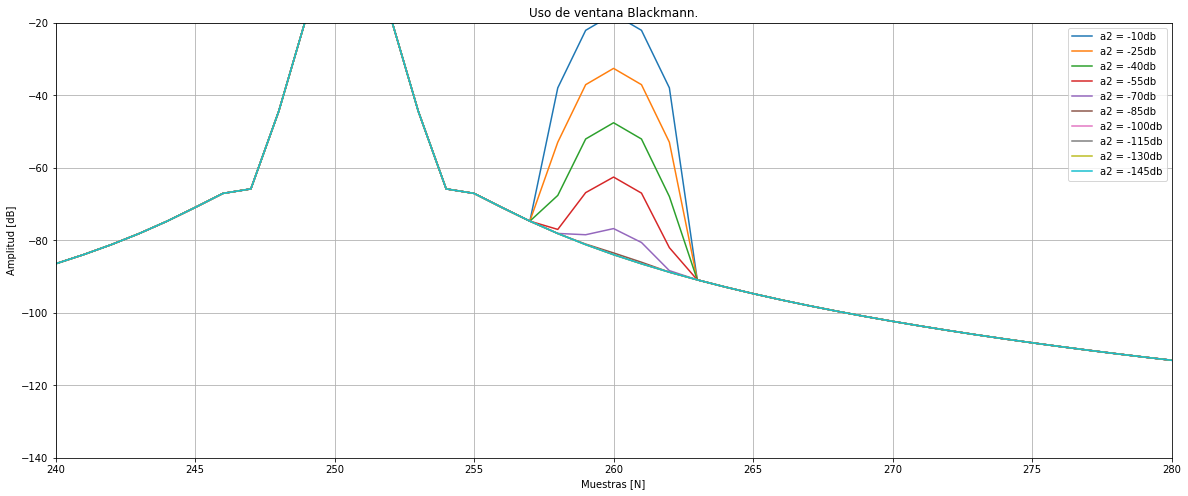

In [107]:
# Ventana Blackman sin desintonía.
db = -10

plt.figure(1,figsize=(20,8))
for i in range(10):
    v2 = 10 ** (db/20)
    tt2, x2 = mi_func_sen (v2, dc, o2, ph, N, fs)
    xt = x1 + x2
    
    w= blackman * xt
    e = abs (npy.fft.fft(w)) * (2/N)
    e = 20 * npy.log10(e)
    
    plt.plot(e[:500],label='a2 = '+str(db)+'db')
    db = db - 15
plt.title('Uso de ventana Blackmann.')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.xlim(240,280)
plt.ylim(-140,-20)
plt.legend()
plt.grid()

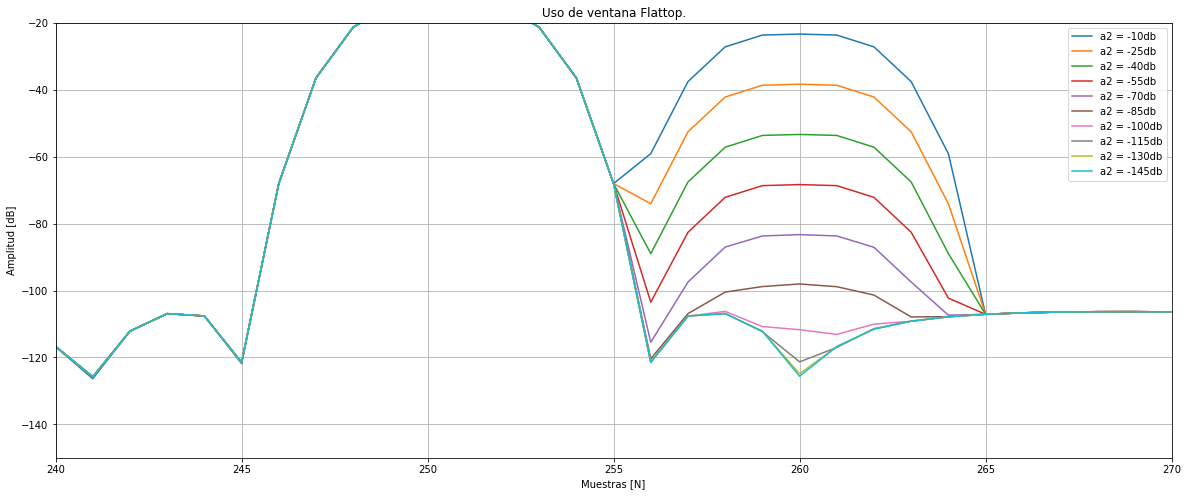

In [106]:
# Ventana Flattop sin desintonía.
db = -10

plt.figure(1,figsize=(20,8))
for i in range(10):
    v2 = 10 ** (db/20)
    tt2, x2 = mi_func_sen (v2, dc, o2, ph, N, fs)
    xt = x1 + x2
    
    w= flattop * xt
    e = abs (npy.fft.fft(w)) * (2/N)
    e = 20 * npy.log10(e)
    
    plt.plot(e[:500],label='a2 = '+str(db)+'db')
    db = db - 15
plt.title('Uso de ventana Flattop.')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.xlim(240,270)
plt.ylim(-150,-20)
plt.legend()
plt.grid()


In [83]:
import numpy as npy
import matplotlib.pyplot as plt
import scipy as spy
from scipy import signal

## Generación de señal bitonal con desintonía fd = 0.5.

v1 = 1
dc = 0
ph = 0
fs = 1000
N = 1000
fd = 0.5

# Resolución espectral unitaria.
df = fs / N

# Obtengo las pulsaciones.
o1 = fs / 4
o2 = o1 + (10 * df)

# Creo x1
tt1, x1 = mi_func_sen (v1, dc, o1 + fd * df, ph, N, fs)

# Creo las ventanas.
rect = spy.signal.boxcar(N)
bart = spy.signal.bartlett(N)
hann = spy.signal.hann(N)
blackman = spy.signal.blackman(N)
flattop = spy.signal.flattop(N)

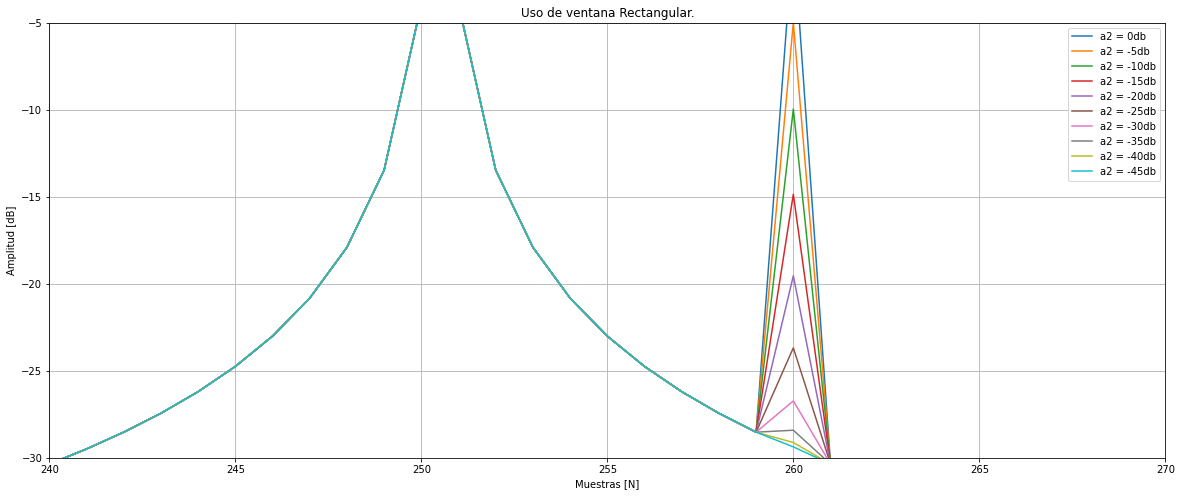

In [105]:
# Ventana Rectangular con desintonía.
db = 0

plt.figure(1,figsize=(20,8))
for i in range(10):
    v2 = 10 ** (db/20)
    tt2, x2 = mi_func_sen (v2, dc, o2, ph, N, fs)
    xt = x1 + x2
    
    w= rect * xt
    e = abs (npy.fft.fft(w)) * (2/N)
    e = 20 * npy.log10(e)
    
    plt.plot(e[:500],label='a2 = '+str(db)+'db')
    db = db - 5
plt.title('Uso de ventana Rectangular.')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.xlim(240,270)
plt.ylim(-30,-5)
plt.legend()
plt.grid()

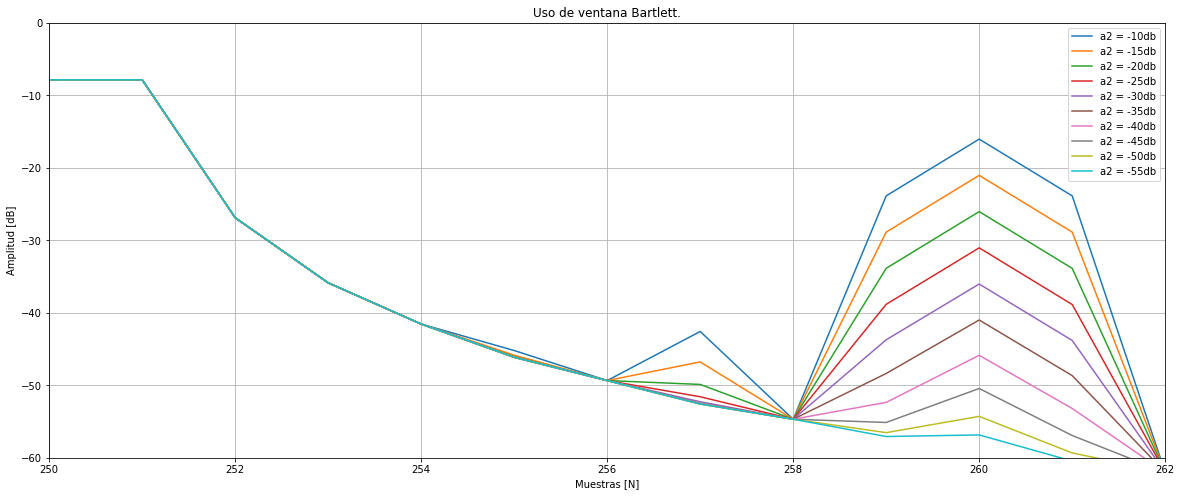

In [103]:
# Ventana Bartlett con desintonía.
db = -10

plt.figure(1,figsize=(20,8))
for i in range(10):
    v2 = 10 ** (db/20)
    tt2, x2 = mi_func_sen (v2, dc, o2, ph, N, fs)
    xt = x1 + x2
    
    w= bart * xt
    e = abs (npy.fft.fft(w)) * (2/N)
    e = 20 * npy.log10(e)
    
    plt.plot(e[:500],label='a2 = '+str(db)+'db')
    db = db - 5
plt.title('Uso de ventana Bartlett.')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.xlim(250,262)
plt.ylim(-60,-0)
plt.legend()
plt.grid()

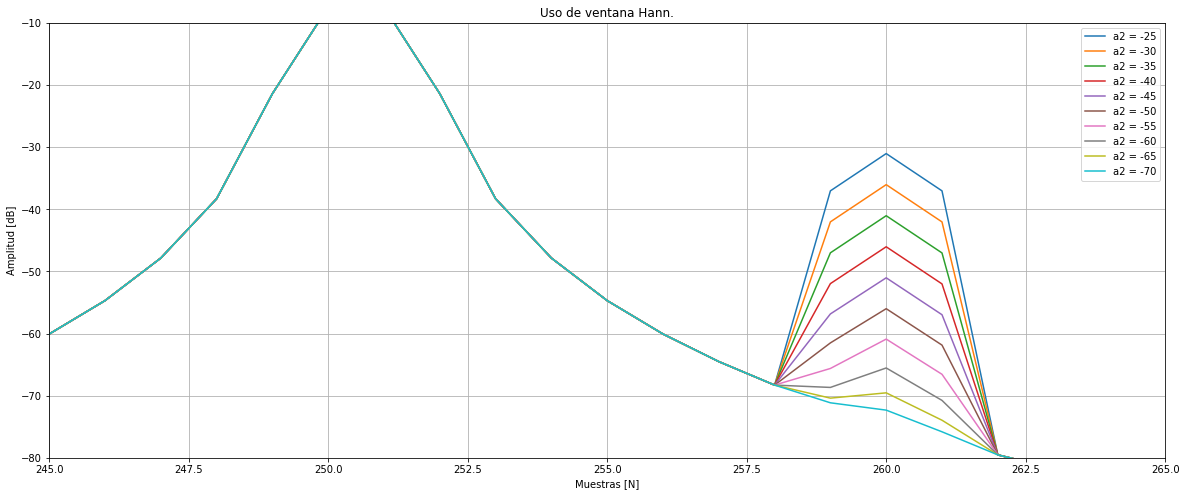

In [98]:
# Ventana Hann con desintonía.
db = -25

plt.figure(1,figsize=(20,8))
for i in range(10):
    v2 = 10 ** (db/20)
    tt2, x2 = mi_func_sen (v2, dc, o2, ph, N, fs)
    xt = x1 + x2
    
    w= hann * xt
    e = abs (npy.fft.fft(w)) * (2/N)
    e = 20 * npy.log10(e)
    
    plt.plot(e[:500],label='a2 = '+str(db))
    db = db - 5
plt.title('Uso de ventana Hann.')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.xlim(245,265)
plt.ylim(-80,-10)
plt.legend()
plt.grid()

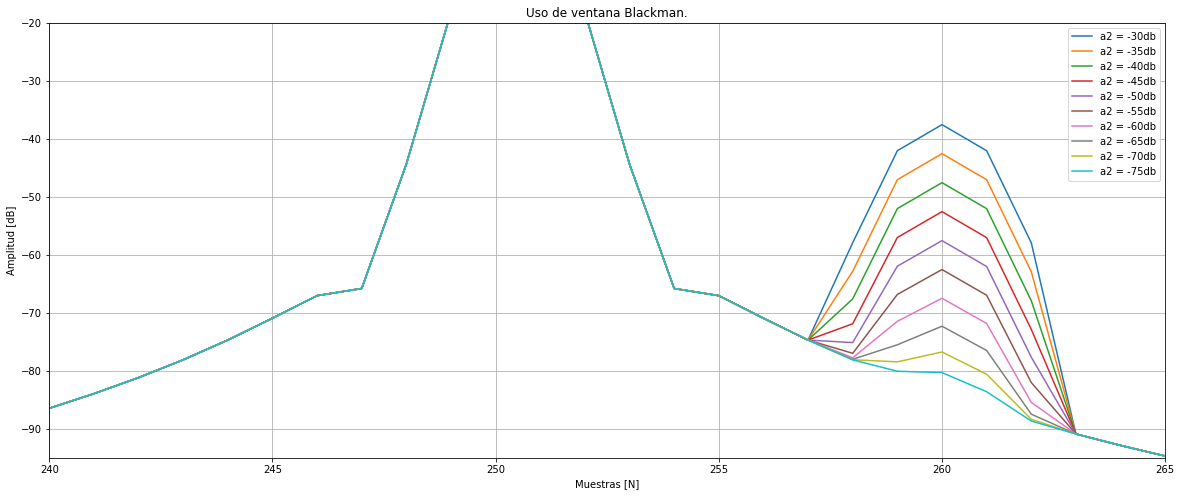

In [102]:
# Ventana Blackman con desintonía.
db = -30

plt.figure(1,figsize=(20,8))
for i in range(10):
    v2 = 10 ** (db/20)
    tt2, x2 = mi_func_sen (v2, dc, o2, ph, N, fs)
    xt = x1 + x2
    
    w= blackman * xt
    e = abs (npy.fft.fft(w)) * (2/N)
    e = 20 * npy.log10(e)
    
    plt.plot(e[:500],label='a2 = '+str(db)+'db')
    db = db - 5
plt.title('Uso de ventana Blackman.')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.xlim(240,265)
plt.ylim(-95,-20)
plt.legend()
plt.grid()

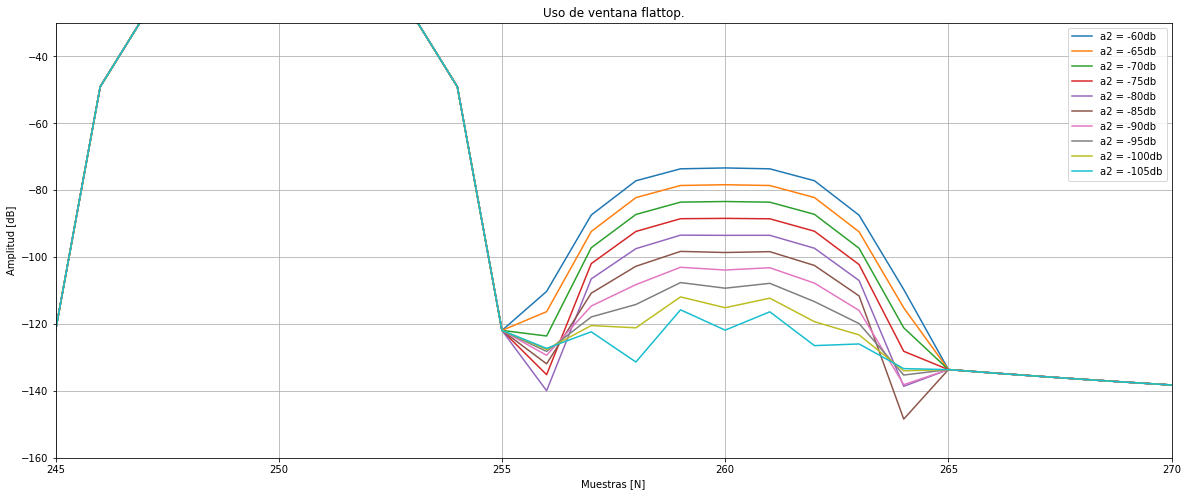

In [122]:
# Ventana Flattop con desintonía.
db = -60

plt.figure(1,figsize=(20,8))
for i in range(10):
    v2 = 10 ** (db/20)
    tt2, x2 = mi_func_sen (v2, dc, o2, ph, N, fs)
    xt = x1 + x2
    
    w= flattop * xt
    e = abs (npy.fft.fft(w)) * (2/N)
    e = 20 * npy.log10(e)
    
    plt.plot(e[:500],label='a2 = '+str(db)+'db')
    db = db - 5
plt.title('Uso de ventana flattop.')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.xlim(245,270)
plt.ylim(-160,-30)
plt.legend()
plt.grid()

In [142]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['-260', '-30'], # <-- acá debería haber numeritos :)
                   ['-260', '-45'], # <-- acá debería haber numeritos :)
                   ['-100', '-65'], # <-- acá debería haber numeritos :)
                   ['-100', '-70'], # <-- acá debería haber numeritos :)
                   ['-100', '-90'] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a^0_2$ (dB)','$a^1_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$a^0_2$ (dB),$a^1_2$ (dB)
Rectangular,-260,-30
Bartlett,-260,-45
Hann,-100,-65
Blackman,-100,-70
Flat-top,-100,-90


<div class="alert alert-block alert-warning">
<b>Comentario:</b> La tabla se completó a partir de la visualización de los 10 gráficos anteriores. En los mismos se puede apreciar la aplicación de las 5 ventanas vistas sobre una señal bitono. En todos los casos, se realizó una iteración de 10 veces, realizando así sobre cada figura 10 ploteos dónde en cada uno se iba variando la amplitud de la señal $x_2$. El valorinicial de la variable "db" (amplitud de %x_2%) iba variando en cada caso según convenía.
</div>

<div class="alert alert-block alert-info">
<b>2.e)</b> Para las ventanas analizadas en 1), decida cuál sería la más apropiada en el caso que, <b>sin afectar otro parámetro</b>, $\Omega_2$ pudiera acercarse libremente a $\Omega_1 = \frac{\pi}{2} + 0.5·\frac{2\pi}{N}$. Complete la siguiente tabla con la distancia mínima, $\Omega_0, $ a la que se puede distinguir $x_2$ en $\lvert X_w(\Omega) \rvert$.
</div>

In [126]:
# Generación de señal bitonal.
v1 = 1
dc = 0
ph = 0
fs = 1000
N = 1000
fd_fix = 0.5
db = -40
v2 = 10 ** (db/20)

# Resolución espectral unitaria.
df = fs / N

# Obtengo las pulsaciones.
o1 = fs / 4
# o2 = o1 + (10 * df) 
o2 = o1
# Creo x1
tt1, x1 = mi_func_sen (v1, dc, o1, ph, N, fs)

# Creo las ventanas.
rect = spy.signal.boxcar(N)
bart = spy.signal.bartlett(N)
hann = spy.signal.hann(N)
blackman = spy.signal.blackman(N)
flattop = spy.signal.flattop(N)

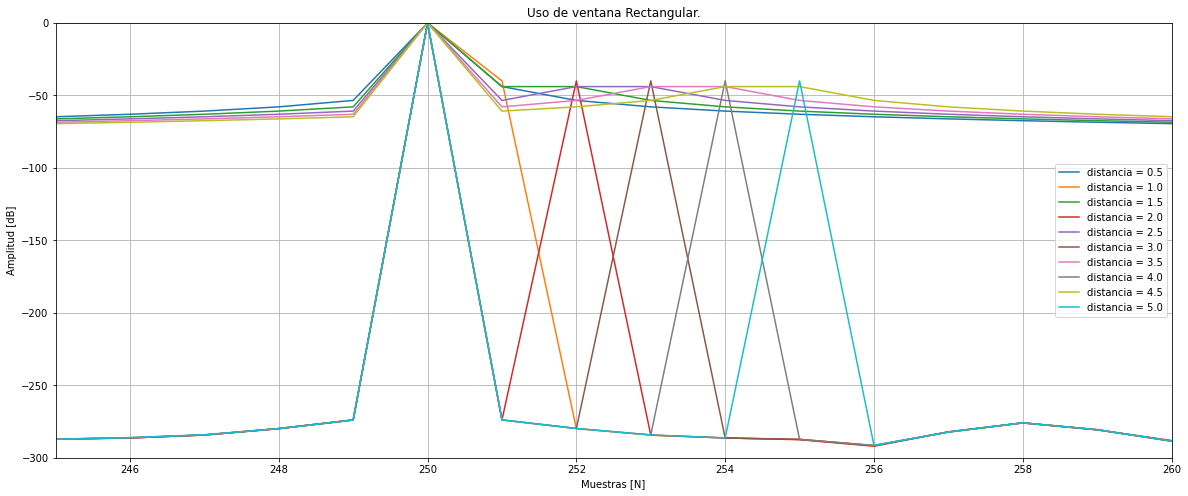

In [128]:
# Ventana Rectangular.
fd_var = 0.5

plt.figure(1,figsize=(20,8))
for i in range(10):
    
    tt2, x2 = mi_func_sen (v2, dc, o2 + fd_var * df, ph, N, fs)
    xt = x1 + x2
    
    w= rect * xt
    e = abs (npy.fft.fft(w)) * (2/N)
    e = 20 * npy.log10(e)
    
    plt.plot(e[:500],label='distancia = ' + str(fd_var))
    fd_var = fd_var + 0.5
plt.title('Uso de ventana Rectangular.')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.xlim(245,260)
plt.ylim(-300,-0)
plt.legend()
plt.grid()

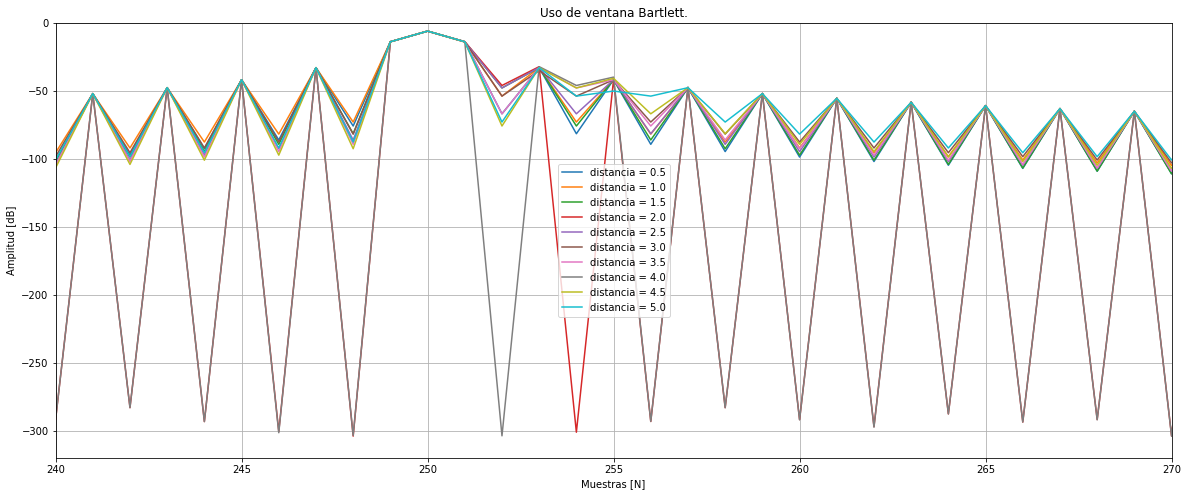

In [131]:
# Ventana Bartlett.
fd_var = 0.5

plt.figure(1,figsize=(20,8))
for i in range(10):
    
    tt2, x2 = mi_func_sen (v2, dc, o2 + fd_var * df, ph, N, fs)
    xt = x1 + x2
    
    w= bart * xt
    e = abs (npy.fft.fft(w)) * (2/N)
    e = 20 * npy.log10(e)
    
    plt.plot(e[:500],label='distancia = ' + str(fd_var))
    fd_var = fd_var + 0.5
plt.title('Uso de ventana Bartlett.')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.xlim(240,270)
plt.ylim(-320,-0)
plt.legend()
plt.grid()

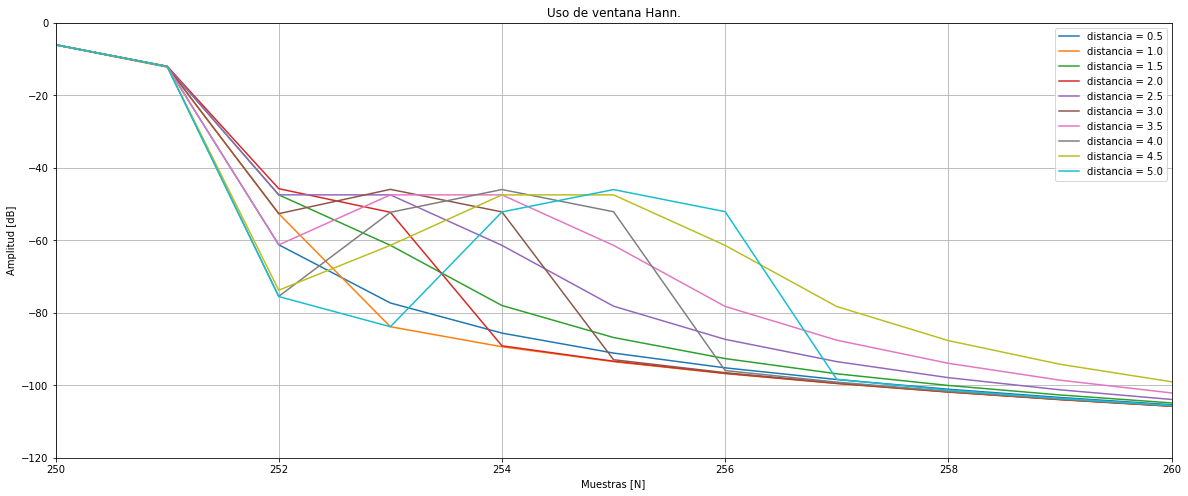

In [134]:
# Ventana Hann.
fd_var = 0.5

plt.figure(1,figsize=(20,8))
for i in range(10):
    
    tt2, x2 = mi_func_sen (v2, dc, o2 + fd_var * df, ph, N, fs)
    xt = x1 + x2
    
    w= hann * xt
    e = abs (npy.fft.fft(w)) * (2/N)
    e = 20 * npy.log10(e)
    
    plt.plot(e[:500],label='distancia = ' + str(fd_var))
    fd_var = fd_var + 0.5
plt.title('Uso de ventana Hann.')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.xlim(250,260)
plt.ylim(-120,-0)
plt.legend()
plt.grid()

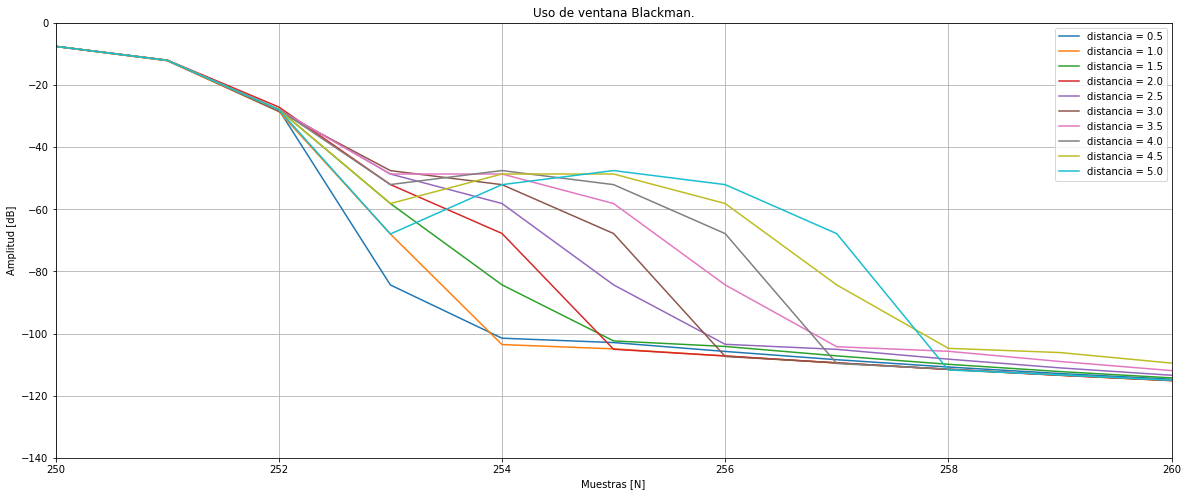

In [137]:
# Ventana Blackman.
fd_var = 0.5

plt.figure(1,figsize=(20,8))
for i in range(10):
    
    tt2, x2 = mi_func_sen (v2, dc, o2 + fd_var * df, ph, N, fs)
    xt = x1 + x2
    
    w= blackman * xt
    e = abs (npy.fft.fft(w)) * (2/N)
    e = 20 * npy.log10(e)
    
    plt.plot(e[:500],label='distancia = ' + str(fd_var))
    fd_var = fd_var + 0.5
plt.title('Uso de ventana Blackman.')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.xlim(250,260)
plt.ylim(-140,-0)
plt.legend()
plt.grid()

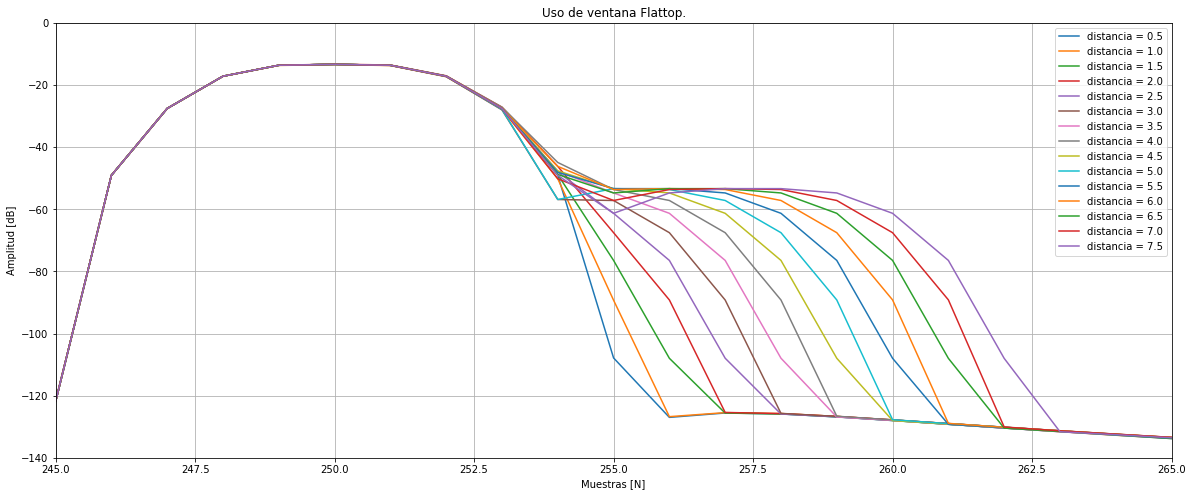

In [140]:
# Ventana Flattop.
fd_var = 0.5

plt.figure(1,figsize=(20,8))
for i in range(15):
    
    tt2, x2 = mi_func_sen (v2, dc, o2 + fd_var * df, ph, N, fs)
    xt = x1 + x2
    
    w = flattop * xt
    e = abs (npy.fft.fft(w)) * (2/N)
    e = 20 * npy.log10(e)
    
    plt.plot(e[:500],label='distancia = ' + str(fd_var))
    fd_var = fd_var + 0.5
plt.title('Uso de ventana Flattop.')
plt.xlabel('Muestras [N]')
plt.ylabel('Amplitud [dB]')
plt.xlim(245,265)
plt.ylim(-140,-0)
plt.legend()
plt.grid()

In [141]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   '3', # <-- acá debería haber numeritos :)
                   '3', # <-- acá debería haber numeritos :)
                   '4', # <-- acá debería haber numeritos :)
                   '5', # <-- acá debería haber numeritos :)
                   '5' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\Omega_0$ (#)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$\Omega_0$ (#)
Rectangular,3
Bartlett,3
Hann,4
Blackman,5
Flat-top,5


<div class="alert alert-block alert-warning">
<b>Comentario:</b> Considerando no sólo la distancia mínima, sino también la amplitud a la que aparece el pico, la ventana de Hann parece la más apropiada. Respecto a la ventana de Bartlett, es difícil observar la distancia mínima, con lo cuál, teniendo en cuenta análisis previos, estimo que su distancia mínima es similar a la rectangular, ya que en el punto 2, la Bartlett era la más cercana a la rectangular en referencia a las características analizadas.
</div>

<div class="alert alert-block alert-info">
<b>3)</b> Genere la siguiente señal 

</div>

  $  x(k) = a_0·\mathop{sen}(\Omega_1·k)$


siendo 

  $a_0 = 2$

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y la variable aleatoria definida por

  $f_r \sim \mathcal{U}(-2, \, 2) $

Considere 200 realizaciones para cada experimento requerido en los siguiente incisos.


U = distribucion uniforme cualquier entre -2 y 2
n/4 -2 y n/4 +2
usar matriz mejor (200x200) -> ojo axis = -1 (defecto) ver eso

In [232]:
# Inicialización.

N = 1000     # Muestras
fs = 1000   # F. de muestreo.
M = 200      # Realizaciones.

df = fs / N # Resolución espectral.

a0 = 2

fr = npy.random.uniform(-2,2,M) # M realizaciones de la var.  aleatoria.

o0 = fs / 4
o1 = o0 + fr * df

tt = npy.arange(df, step=1/fs)

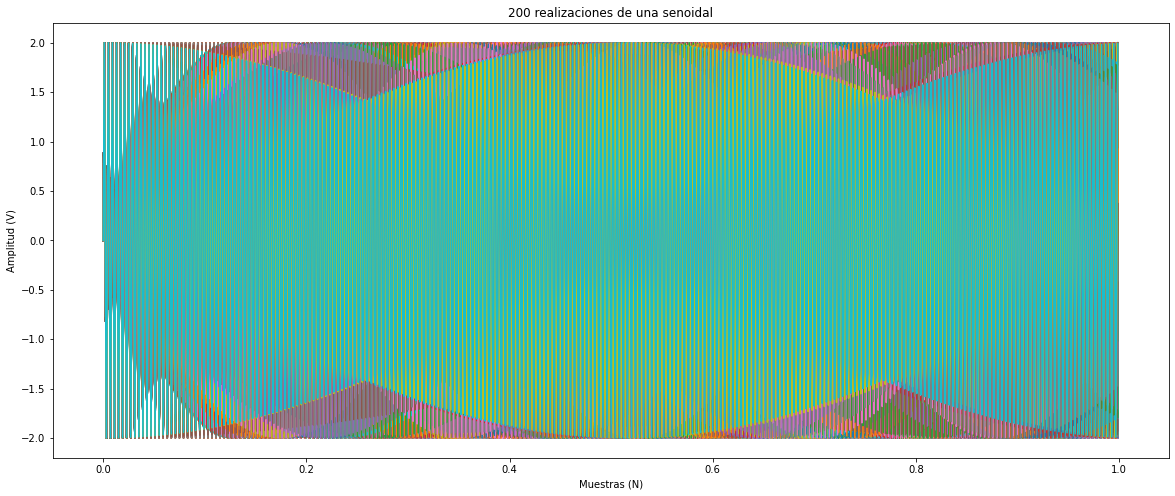

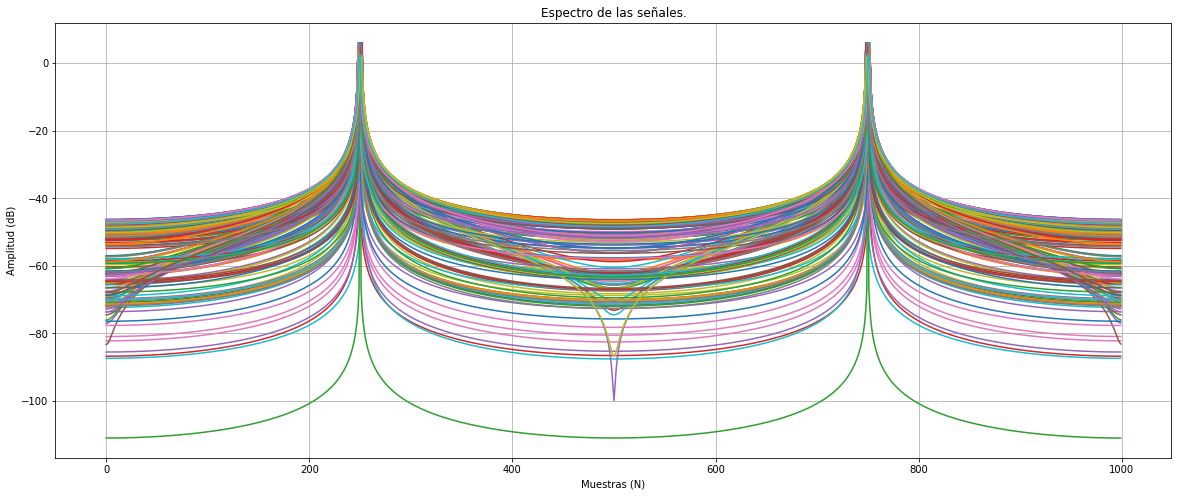

In [228]:
# Señales y espectro de las mismas.

for i in range(M):
    x = a0 * npy.sin(2*npy.pi*o1[i]*tt)
    e = abs(npy.fft.fft(x)) * (2/N)
    e = 20 * npy.log10(e)
    
    plt.figure(1,figsize=(20,8))
    plt.plot(tt,x)
    plt.title('200 realizaciones de una senoidal')
    plt.xlabel('Muestras (N)')
    plt.ylabel('Amplitud (V)')
    plt.grid()
    
    plt.figure(2,figsize=(20,8))
    plt.plot(e)
    plt.title('Espectro de las señales.')
    plt.xlabel('Muestras (N)')
    plt.ylabel('Amplitud (dB)')

plt.grid()


<div class="alert alert-block alert-info">
<b>3.a)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

 
  $ \hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$
  
siendo

  $\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert $ 
  
para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

El sesgo y la varianza se definen para este caso como

  $ s_a = \mathop{E}\{ \hat{a_0}\} - a_0  $
    
  $ v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \} $
  
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales ($a=a_0$ para simplificar la notación)

  $ \mathop{E}\{ \hat{a_0}\}  = \hat{\mu_a} =  \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}} $
  
  $ s_a = \hat{\mu_a} - a  $
    
  $ v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2 $



Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

In [215]:
# Ventanas.

N = 100
fs = 100

rect = spy.signal.boxcar(N)
bart = spy.signal.bartlett(N)
hann = spy.signal.hann(N)
blackman = spy.signal.blackman(N)
flattop = spy.signal.flattop(N)

var = []
ses = []

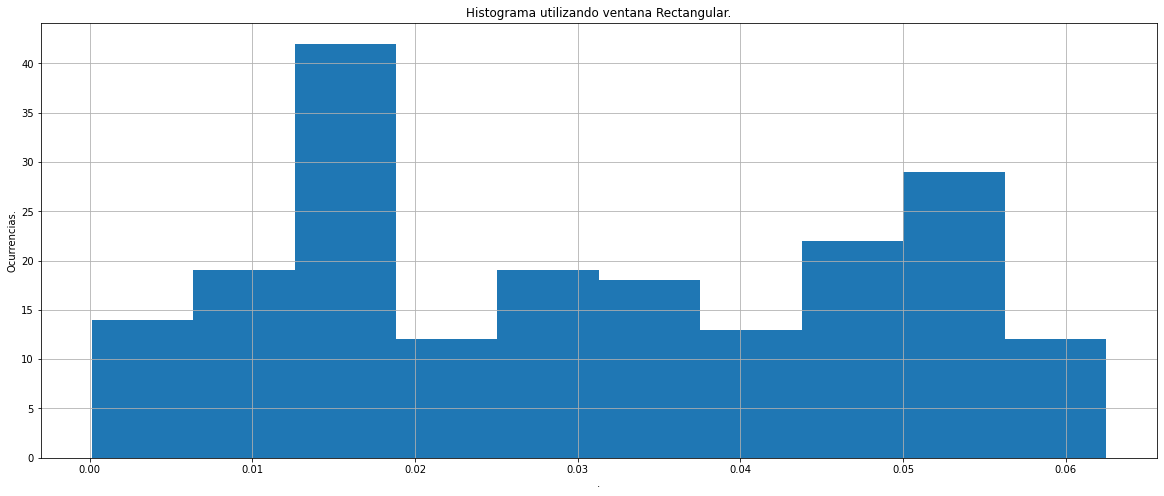

In [216]:
# Análisis para ventana rectangular.
windowed = []

for i in range(M):
    x = a0 * npy.sin(2*npy.pi*o1[i]*tt)
    w = x * rect
    e = abs(npy.fft.fft(w)) * (a0/N)
    windowed.append(e)

matrix = npy.array(windowed) # Transformo lista a matriz.
matrix = npy.transpose(matrix) # Aplico traspuesta para que quede (100,200)
   
varianza = npy.var (matrix[10][0:]) # Varianza en bin 10 en forma multidim.
sesgo = npy.mean (matrix[10][0:]) - a0 # Sesgo del estimador.

var.append(varianza)
ses.append(sesgo)

# Histograma.
plt.figure(1,figsize=(20,8))
plt.hist(matrix[10][0:],10)
plt.title('Histograma utilizando ventana Rectangular.')
plt.xlabel('.')
plt.ylabel('Ocurrencias.')
plt.grid()

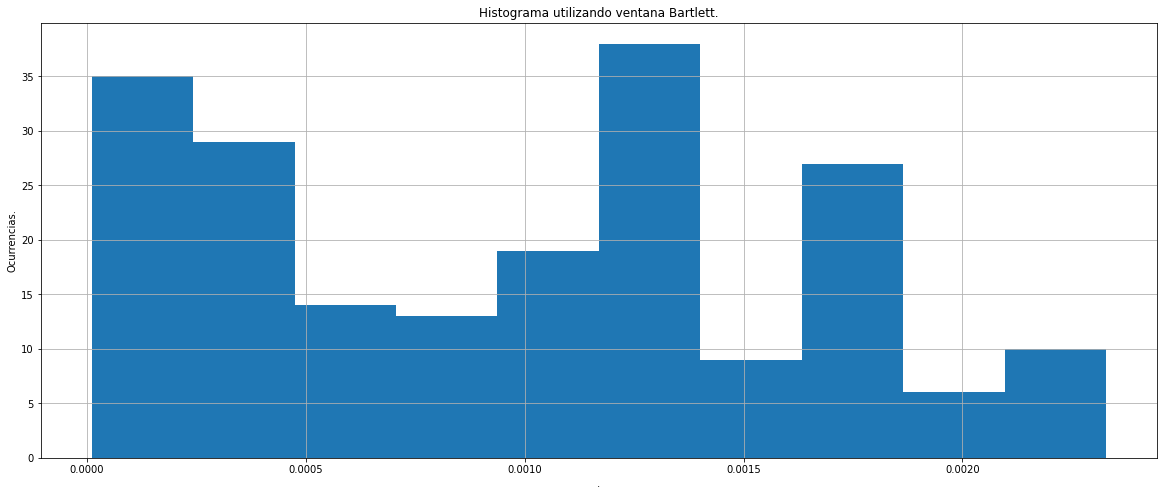

In [217]:
# Análisis para ventana Bartlett.
windowed = []

for i in range(M):
    x = a0 * npy.sin(2*npy.pi*o1[i]*tt)
    w = x * bart
    e = abs(npy.fft.fft(w)) * (a0/N)
    windowed.append(e)

matrix = npy.array(windowed) # Transformo lista a matriz.
matrix = npy.transpose(matrix) # Aplico traspuesta para que quede (100,200)
   
varianza = npy.var (matrix[10][0:]) # Varianza en bin 10 en forma multidim.
sesgo = npy.mean (matrix[10][0:]) - a0 # Sesgo del estimador.

var.append(varianza)
ses.append(sesgo)

# Histograma.
plt.figure(1,figsize=(20,8))
plt.hist(matrix[10][0:],10)
plt.title('Histograma utilizando ventana Bartlett.')
plt.xlabel('.')
plt.ylabel('Ocurrencias.')
plt.grid()

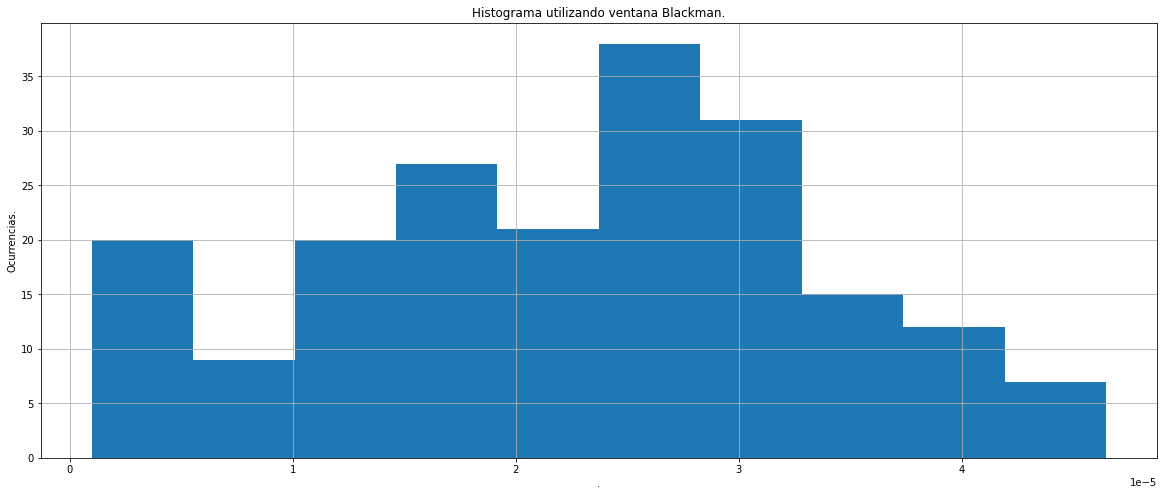

In [218]:
# Análisis para ventana Blackman.
windowed = []

for i in range(M):
    x = a0 * npy.sin(2*npy.pi*o1[i]*tt)
    w = x * blackman
    e = abs(npy.fft.fft(w)) * (a0/N)
    windowed.append(e)

matrix = npy.array(windowed) # Transformo lista a matriz.
matrix = npy.transpose(matrix) # Aplico traspuesta para que quede (100,200)
   
varianza = npy.var (matrix[10][0:]) # Varianza en bin 10 en forma multidim.
sesgo = npy.mean (matrix[10][0:]) - a0 # Sesgo del estimador.

var.append(varianza)
ses.append(sesgo)

# Histograma.
plt.figure(1,figsize=(20,8))
plt.hist(matrix[10][0:],10)
plt.title('Histograma utilizando ventana Blackman.')
plt.xlabel('.')
plt.ylabel('Ocurrencias.')
plt.grid()

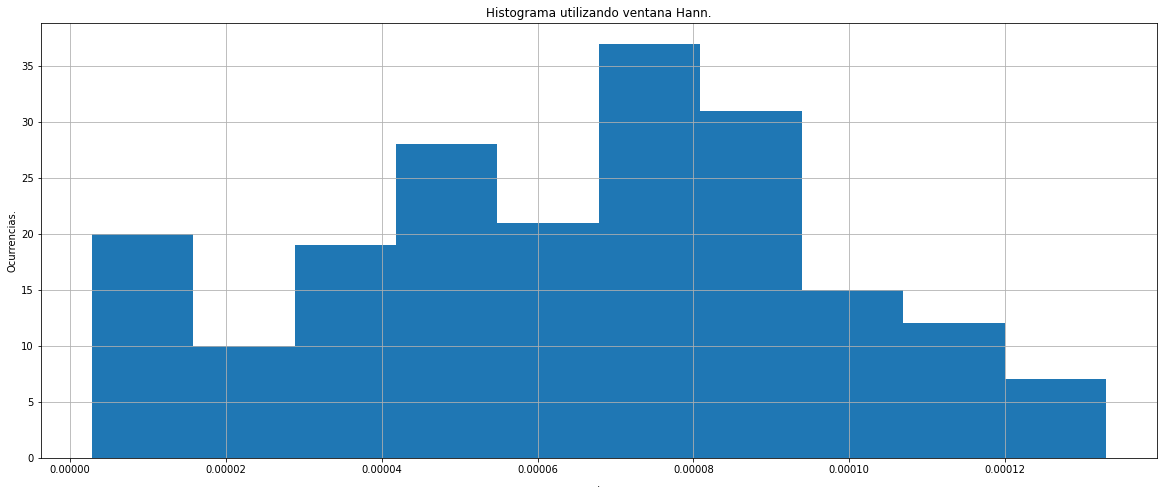

In [219]:
# Análisis para ventana Hann.
windowed = []

for i in range(M):
    x = a0 * npy.sin(2*npy.pi*o1[i]*tt)
    w = x * hann
    e = abs(npy.fft.fft(w)) * (a0/N)
    windowed.append(e)

matrix = npy.array(windowed) # Transformo lista a matriz.
matrix = npy.transpose(matrix) # Aplico traspuesta para que quede (100,200)
   
varianza = npy.var (matrix[10][0:]) # Varianza en bin 10 en forma multidim.
sesgo = npy.mean (matrix[10][0:]) - a0 # Sesgo del estimador.

var.append(varianza)
ses.append(sesgo)

# Histograma.
plt.figure(1,figsize=(20,8))
plt.hist(matrix[10][0:],10)
plt.title('Histograma utilizando ventana Hann.')
plt.xlabel('.')
plt.ylabel('Ocurrencias.')
plt.grid()

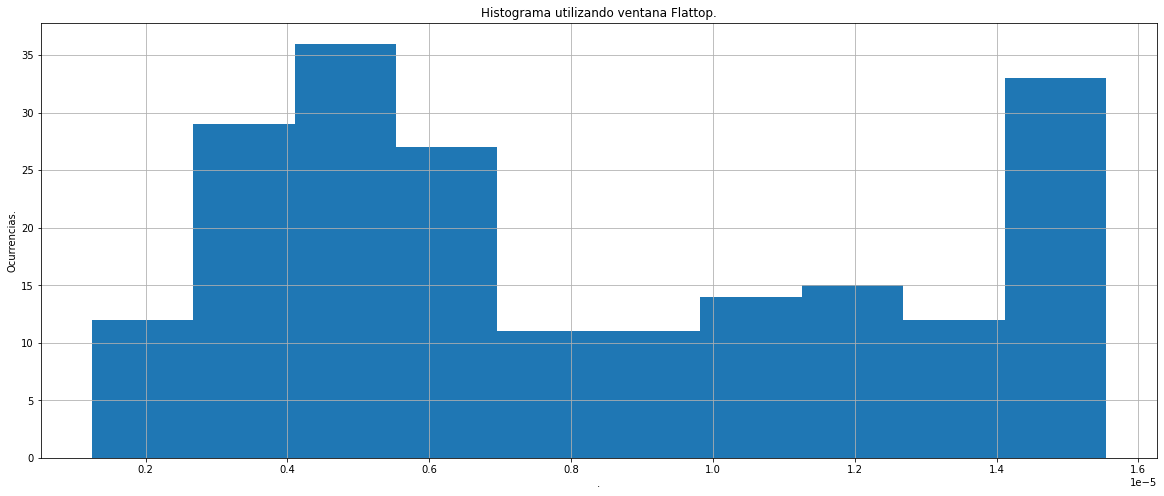

In [220]:
# Análisis para ventana Flattop.
windowed = []

for i in range(M):
    x = a0 * npy.sin(2*npy.pi*o1[i]*tt)
    w = x * flattop
    e = abs(npy.fft.fft(w)) * (a0/N)
    windowed.append(e)

matrix = npy.array(windowed) # Transformo lista a matriz.
matrix = npy.transpose(matrix) # Aplico traspuesta para que quede (100,200)
   
varianza = npy.var (matrix[10][0:]) # Varianza en bin 10 en forma multidim.
sesgo = npy.mean (matrix[10][0:]) - a0 # Sesgo del estimador.

var.append(varianza)
ses.append(sesgo)

# Histograma.
plt.figure(1,figsize=(20,8))
plt.hist(matrix[10][0:],10)
plt.title('Histograma utilizando ventana Flattop.')
plt.xlabel('.')
plt.ylabel('Ocurrencias.')
plt.grid()

In [223]:

# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                    [ses[0],var[0]], # <-- acá debería haber numeritos :)
                    [ses[1],var[1]], # <-- acá debería haber numeritos :
                    [ses[2],var[2]], # <-- acá debería haber numeritos :)
                    [ses[3],var[3]], # <-- acá debería haber numeritos :)
                    [ses[4],var[4]] # <-- acá debería haber numeritos :))
                 ]

df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,-1.969405,3.098963e-04
Bartlett,-1.999016,4.291033e-07
Hann,-1.999978,1.204968e-10
Blackman,-1.999936,9.818131e-10
Flat-top,-1.999992,1.931699e-11


<div class="alert alert-block alert-info">
<b>3.b)</b> Repita a) para el siguiente estimador:
</div>

 
  $ \hat{a_1} = \sqrt{\frac{1}{5}·\sum_{j=a}^{b} \lvert X^i_w(j) \rvert ^2} $
  
siendo $ a = \Omega_0 - 2·\frac{2\pi}{N} $ y $ b = \Omega_0 + 2·\frac{2\pi}{N} $

para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<img src="./ojo.svg" align="left" width="50" />   Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

In [234]:
N = 100
fs = 100

# Análisis para ventana rectangular.
windowed = []

for i in range(M):
    x = a0 * npy.sin(2*npy.pi*o1[i]*tt)
    w = x * rect
    e = abs(npy.fft.fft(w)) * (a0/N)
    windowed.append(e)

matrix = npy.array(windowed) # Transformo lista a matriz.
matrix = npy.transpose(matrix) # Aplico traspuesta para que quede (100,200)

varianza = npy.var (matrix[10][0:]) # Varianza en bin 10 en forma multidim.

a = o0 - 2
b = o0 + 2 * df

estimador = matrix[:a:b][0:]

estimador = npy.mean(matrix[10][0:]) - a0 # Sesgo del estimador.
sesgo = ((1/5) * npy.sqrt(np.sum(estimador ** 2)))

var.append(varianza)
ses.append(sesgo)

# Histograma.
plt.figure(1,figsize=(20,8))
plt.hist(matrix[10][0:],10)
plt.title('Histograma utilizando ventana Rectangular.')
plt.xlabel('.')
plt.ylabel('Ocurrencias.')
plt.grid()






ValueError: operands could not be broadcast together with shapes (1000,) (100,) 

In [29]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,
